In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA 

### Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicate Values

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1337, 7)

### Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### Unique Values (in each column)

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Numerical columns statistics

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Numerical and Categorical Features

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
target = "charges"

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

print("\nCategories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']
We have 3 categorical features : ['sex', 'smoker', 'region']

Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']


### Adding columns

In [16]:
# Adding an age_range categorical column where ages between 0-30 are considered 'young', 31-60 are considered 'middle-aged', and 61-100 are considered as 'old'
df['age_range'] = 'old'
df.loc[(df['age'] > 0) & (df['age'] <= 30), 'age_range'] = 'young'
df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age_range'] = 'middle-aged'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged


In [17]:
# Adding a bmi_range categorical column where bmi <18.5 falls under underweight range, 18.5 - 24.9 falls under normal range, 25.0 - 29.9 falls under overweight range, and >30.0 falls under obese range
df['bmi_range'] = 'normal'
df.loc[(df['bmi'] < 18.5), 'bmi_range'] = 'underweight'
df.loc[(df['bmi'] > 25.0) & (df['bmi'] < 29.9), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] > 30.0), 'bmi_range'] = 'obese'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


### Stats

In [18]:
df.value_counts(['sex'])

sex   
male      675
female    662
Name: count, dtype: int64

In [19]:
df.value_counts(['sex','age_range'])

sex     age_range  
male    middle-aged    402
female  middle-aged    401
male    young          229
female  young          214
        old             47
male    old             44
Name: count, dtype: int64

In [20]:
df.value_counts(['sex','smoker'])

sex     smoker
female  no        547
male    no        516
        yes       159
female  yes       115
Name: count, dtype: int64

In [21]:
df.value_counts(['region'])

region   
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64

In [22]:
df.value_counts(['region','smoker'])

region     smoker
southeast  no        273
southwest  no        267
northwest  no        266
northeast  no        257
southeast  yes        91
northeast  yes        67
northwest  yes        58
southwest  yes        58
Name: count, dtype: int64

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


### Analysis on the above data:

1) What percent of young people are overweight and obese?

2) What percent of middle-aged and old people are normal?

3) What percent of total people have children <=2 and what percent have >2?

4) What percent of middle-aged and old people have 0 children?

## Analysis and Visualizations

### 1) What percent of young people are overweight and obese?

In [46]:
# Analysis
young_df = df[df['age_range'] == 'young']
young_overweight_percent = (young_df[young_df['bmi_range'] == 'overweight']['age_range'].count() / len(young_df)) * 100
young_obese_percent = (young_df[young_df['bmi_range'] == 'obese']['age_range'].count() / len(young_df)) * 100
young_normal_percent = (young_df[young_df['bmi_range'] == 'normal']['age_range'].count() / len(young_df)) * 100
young_underweight_percent = (young_df[young_df['bmi_range'] == 'underweight']['age_range'].count() / len(young_df)) * 100

print("Young people percentage that are overweight: {}%".format(round(young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(young_underweight_percent,2)))


Young people percentage that are overweight: 26.86%
Young people percentage that are obese: 48.76%
Young people percentage that are normal: 21.9%
Young people percentage that are underweight: 2.48%


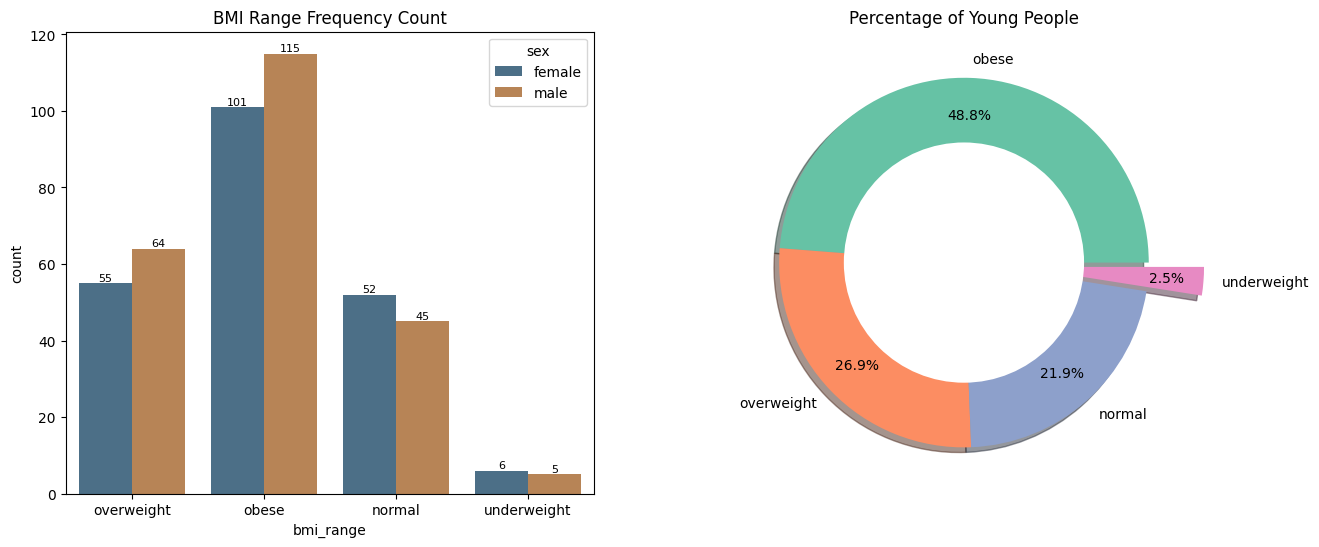

In [25]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(young_df, x='bmi_range', hue='sex', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Young People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

### 2) What percent of middle-aged and old people are normal?

In [45]:
# Analysis
not_young_df = df[df['age_range'].isin(['middle-aged','old'])]

not_young_overweight_percent = (not_young_df[not_young_df['bmi_range'] == 'overweight']['age_range'].count() / len(not_young_df)) * 100
not_young_obese_percent = (not_young_df[not_young_df['bmi_range'] == 'obese']['age_range'].count() / len(not_young_df)) * 100
not_young_normal_percent = (not_young_df[not_young_df['bmi_range'] == 'normal']['age_range'].count() / len(not_young_df)) * 100
not_young_underweight_percent = (not_young_df[not_young_df['bmi_range'] == 'underweight']['age_range'].count() / len(not_young_df)) * 100

print("Young people percentage that are overweight: {}%".format(round(not_young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(not_young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(not_young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(not_young_underweight_percent,2)))


Young people percentage that are overweight: 28.3%
Young people percentage that are obese: 54.59%
Young people percentage that are normal: 16.11%
Young people percentage that are underweight: 1.01%


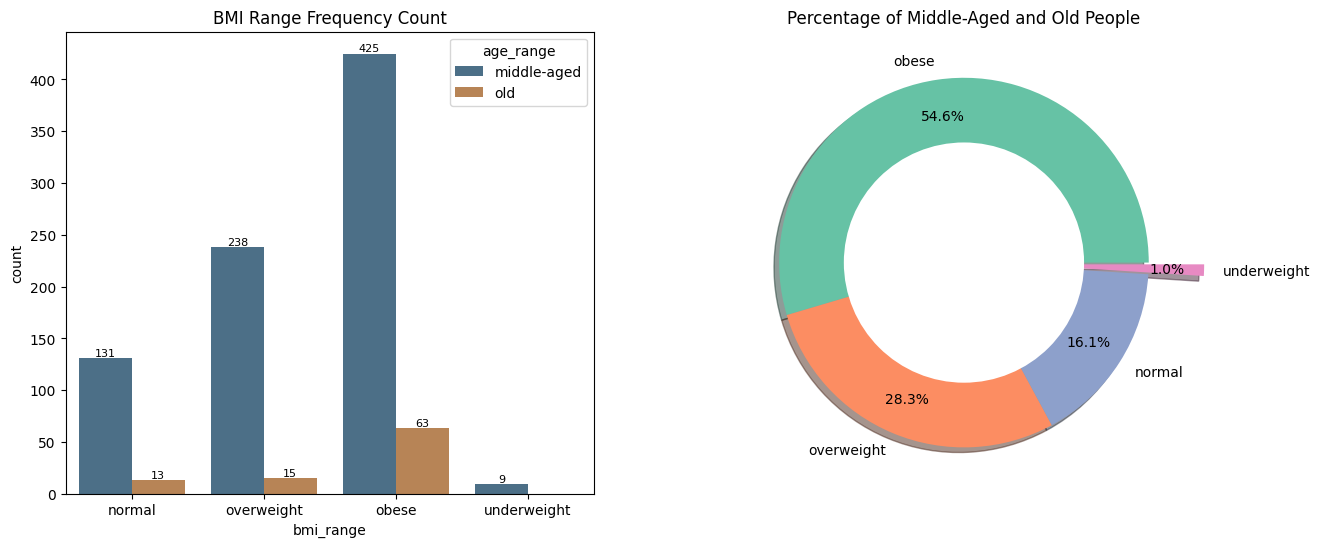

In [27]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(not_young_df, x='bmi_range', hue='age_range', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=not_young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Middle-Aged and Old People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

#### From the above analysis, it is evident that across young and not so young (middle-aged and old) people, the percentages of obese and underweight people are the highest and lowest respectively. It infact follows a similar trend in percentages - obese > overweight > normal > underweight

#### The purpose of above analysis is to check which age_range people are more fit and less likely to incur high medical costs

### 3) What percent of total people have children <=2 and what percent have >2?

In [37]:
# Analysis
children_lte_2 = df[df['children'] <= 2]
children_gt_2 = df[df['children'] > 2]

print("Number and Percentage of people with less than or equal to 2 children: {}, {}%".format(len(children_lte_2), round(len(children_lte_2)/len(df) * 100,2)))
print("Number and Percentage of people with greater than 2 children: {}, {}%".format(len(children_gt_2), round(len(children_gt_2)/len(df) * 100,2)))

print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_lte_2['charges'].sum()/len(children_lte_2),2)))
print("Average charges of people with greater than 2 children: {}".format(round(children_gt_2['charges'].sum()/len(children_gt_2),2)))

Number and Percentage of people with less than or equal to 2 children: 1137, 85.04%
Number and Percentage of people with greater than 2 children: 200, 14.96%

Average charges of people with less than or equal to 2 children: 13051.0
Average charges of people with greater than 2 children: 14576.0


#### From the above analysis, as can be seen, even though the number of people with children more than 2 is less than those of people with less than or equal to 2, the average of charges for the former group is higher than the latter group. That means, more the children, more the medical costs. 

#### Now let's visualize it below using violin plots

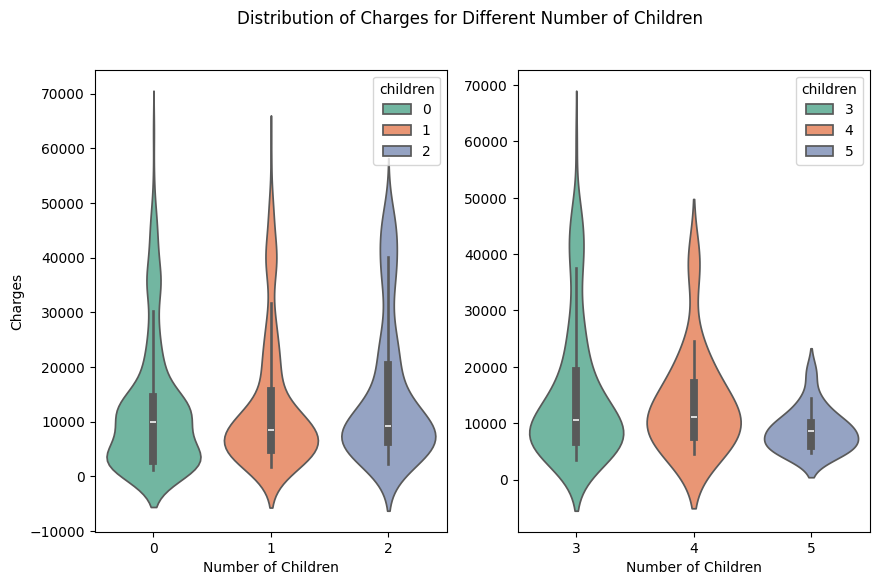

In [30]:
# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.violinplot(x='children', y='charges', hue='children', data=children_lte_2, palette='Set2')
plt.suptitle('Distribution of Charges for Different Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.subplot(1,2,2)
sns.violinplot(x='children', y='charges', hue='children', data=children_gt_2, palette='Set2')
plt.xlabel('Number of Children')
plt.ylabel('')

plt.show()

#### From the above violin plots, an interesting observation is that the maximum value of charges for people with 2 and 3 children is almost same. And consequently, maximum values of people with 4 and 5 children have their maximum values less than those of with 0 and 1 children. 

#### Also as can be seen in the violin plots, there are a lot of outliers. That means, the average values calculated in the previous analysis might have been affected by outliers.

#### Let's check the same analysis after removing the outliers

In [31]:
len(children_lte_2), len(children_gt_2)


(1137, 200)

In [32]:
# Inter Quartile Range
# For people with children less than or equal to 2
q1_lte2 = children_lte_2['charges'].quantile(0.25)
q3_lte2 = children_lte_2['charges'].quantile(0.75)
iqr_lte2 = q3_lte2 - q1_lte2
lower_lte2 = q1_lte2 - 1.5*iqr_lte2
upper_lte2 = q3_lte2 + 1.5*iqr_lte2
 
# Create a mask to identify outliers
outliers_mask = (children_lte_2['charges'] < lower_lte2) | (children_lte_2['charges'] > upper_lte2)

# Drop the outliers from the DataFrame
children_lte_2 = children_lte_2[~outliers_mask]

# For people with children greater than 2
q1_gt2 = children_gt_2['charges'].quantile(0.25)
q3_gt2 = children_gt_2['charges'].quantile(0.75)
iqr_gt2 = q3_gt2 - q1_gt2
lower_gt2 = q1_gt2 - 1.5*iqr_gt2
upper_gt2 = q3_gt2 + 1.5*iqr_gt2
 
outliers_mask = (children_gt_2['charges'] < lower_gt2) | (children_gt_2['charges'] > upper_gt2)

children_gt_2 = children_gt_2[~outliers_mask]

len(children_lte_2), len(children_gt_2)


(1015, 180)

In [33]:
print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(children_lte_2['charges'].sum()/len(children_lte_2),2)))
print("Average charges of people with greater than 2 children: {}".format(round(children_gt_2['charges'].sum()/len(children_gt_2),2)))


Average charges of people with less than or equal to 2 children: 9600.31
Average charges of people with greater than 2 children: 11419.71


#### Even after removing outliers, the average of charges for people with children more than 2 still seem to be higher than those of with less than or equal to 2

### 4) What percent of middle-aged and old people have 0 children?


In [44]:
middle_aged_df = df[(df['age_range'] == 'middle-aged') & (df['children'] == 0)]
old_df = df[(df['age_range'] == 'old') & (df['children'] == 0)]


print("Number and Percentage of middle-aged people with 0 children: {}, {}%".format(len(middle_aged_df), round(len(middle_aged_df)/len(df) * 100, 2)))
print("Number and Percentage of old people with 0 children: {}, {}%".format(len(old_df), round(len(old_df)/len(df) * 100, 2)))

print("\nAverage charges of people with less than or equal to 2 children: {}".format(round(middle_aged_df['bmi'].sum()/len(middle_aged_df),2)))
print("Average charges of people with greater than 2 children: {}".format(round(old_df['bmi'].sum()/len(old_df),2)))
                        

Number and Percentage of middle-aged people with 0 children: 265, 19.82%
Number and Percentage of old people with 0 children: 61, 4.56%

Average charges of people with less than or equal to 2 children: 30.68
Average charges of people with greater than 2 children: 32.06
